In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing dataset
data=pd.read_csv("balance_scale.csv",header=None)
data.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [3]:
#Converting categorial variables into numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[0]=le.fit_transform(data[0])
data.head()

,0,1,2,3,4
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5


In [4]:
data.dtypes

0    int32
1    int64
2    int64
3    int64
4    int64
dtype: object

In [5]:
data.describe()

,0,1,2,3,4
count,625.000000,625.000000,625.000000,625.000000,625.000000
mean,1.382400,3.000000,3.000000,3.000000,3.000000
std,0.627375,1.415346,1.415346,1.415346,1.415346
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,4.000000,4.000000,4.000000,4.000000
max,2.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
0    625 non-null int32
1    625 non-null int64
2    625 non-null int64
3    625 non-null int64
4    625 non-null int64
dtypes: int32(1), int64(4)
memory usage: 22.1 KB


In [7]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

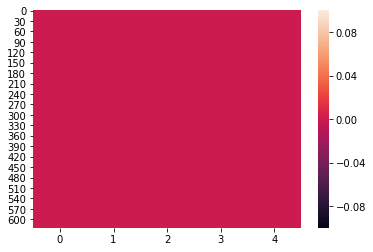

In [8]:
sns.heatmap(data.isnull())

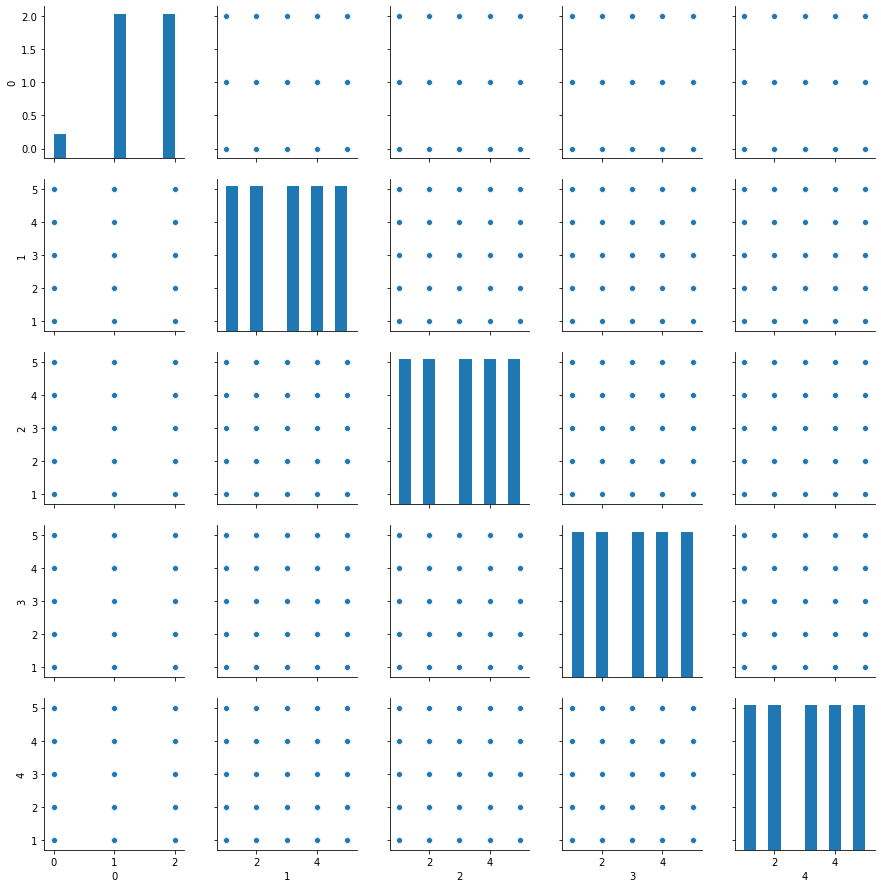

In [9]:
sns.pairplot(data)

In [10]:
data.skew()

0   -0.505934
1    0.000000
2    0.000000
3    0.000000
4    0.000000
dtype: float64

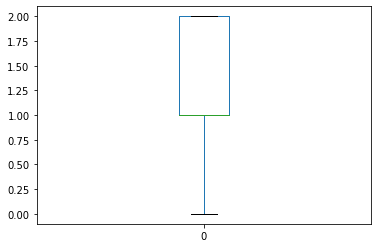

In [11]:
# checking the outliers
data[0].plot.box()

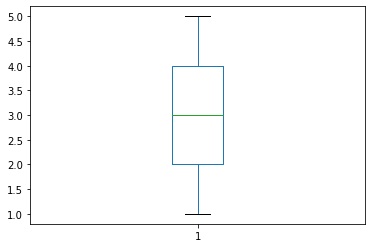

In [12]:
data[1].plot.box()

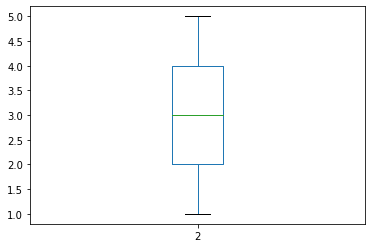

In [13]:
data[2].plot.box()

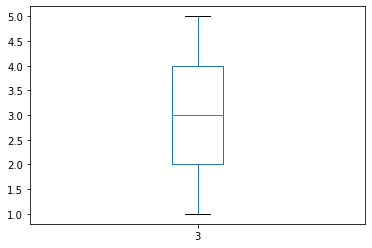

In [14]:
data[3].plot.box()

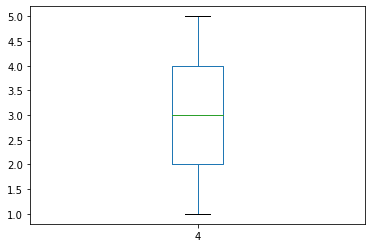

In [15]:
data[4].plot.box()

In [16]:
data.shape

(625, 5)

In [17]:
data.corr()

,0,1,2,3,4
0,1.000000,-0.306813,-0.306813,0.323056,0.323056
1,-0.306813,1.000000,0.000000,0.000000,0.000000
2,-0.306813,0.000000,1.000000,0.000000,0.000000
3,0.323056,0.000000,0.000000,1.000000,0.000000
4,0.323056,0.000000,0.000000,0.000000,1.000000


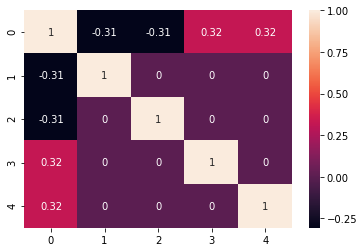

In [18]:
sns.heatmap(data.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A5DBAD9CF8>,
      dtype=object)

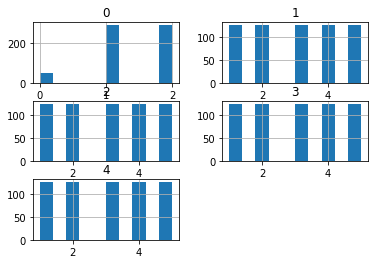

In [19]:
data.hist()

# Splitting the data into Training and Test

In [21]:
x=data.drop(0,axis=1)
x.head()

,1,2,3,4
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [22]:
y=data[0]
y.head()

0    0
1    2
2    2
3    2
4    2
Name: 0, dtype: int32

In [23]:
print(x.shape)
print(y.shape)

(625, 4)
(625,)


In [24]:
#APllYING MODELS 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=1)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(468, 4)
(157, 4)
(468,)
(157,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [28]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8535031847133758
[[ 0 12  1]
 [ 0 72  2]
 [ 0  8 62]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.78      0.97      0.87        74
           2       0.95      0.89      0.92        70

    accuracy                           0.85       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.79      0.85      0.82       157



In [29]:
svc=SVC(kernel="poly")
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[13  0  0]
 [ 0 74  0]
 [ 0  0 70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        70

    accuracy                           1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



In [30]:
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9235668789808917
[[12  0  1]
 [ 1 71  2]
 [ 6  2 62]]
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.97      0.96      0.97        74
           2       0.95      0.89      0.92        70

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.88       157
weighted avg       0.94      0.92      0.93       157



In [31]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8853503184713376
[[ 0  4  9]
 [ 0 71  3]
 [ 0  2 68]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.92      0.96      0.94        74
           2       0.85      0.97      0.91        70

    accuracy                           0.89       157
   macro avg       0.59      0.64      0.62       157
weighted avg       0.81      0.89      0.85       157



In [32]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7579617834394905
[[ 0  7  6]
 [10 60  4]
 [ 6  5 59]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.83      0.81      0.82        74
           2       0.86      0.84      0.85        70

    accuracy                           0.76       157
   macro avg       0.56      0.55      0.56       157
weighted avg       0.77      0.76      0.77       157



In [33]:
nb=MultinomialNB()
nb.fit(x_train,y_train)
prednb=nb.predict(x_test)
print(accuracy_score(y_test,prednb))
print(confusion_matrix(y_test,prednb))
print(classification_report(y_test,prednb))

0.8853503184713376
[[ 0  0 13]
 [ 0 71  3]
 [ 0  2 68]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.97      0.96      0.97        74
           2       0.81      0.97      0.88        70

    accuracy                           0.89       157
   macro avg       0.59      0.64      0.62       157
weighted avg       0.82      0.89      0.85       157



In [34]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8407643312101911
[[ 1  3  9]
 [ 3 68  3]
 [ 3  4 63]]
              precision    recall  f1-score   support

           0       0.14      0.08      0.10        13
           1       0.91      0.92      0.91        74
           2       0.84      0.90      0.87        70

    accuracy                           0.84       157
   macro avg       0.63      0.63      0.63       157
weighted avg       0.81      0.84      0.83       157



In [35]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.821656050955414
[[ 0  6  7]
 [ 6 65  3]
 [ 4  2 64]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.89      0.88      0.88        74
           2       0.86      0.91      0.89        70

    accuracy                           0.82       157
   macro avg       0.59      0.60      0.59       157
weighted avg       0.81      0.82      0.81       157



In [36]:
#Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters=[{"C":[1,10,100,1000],'kernel':['linear']},
            {"C":[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
            {"C":[1,10,100,1000],'kernel':['poly'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(estimator=svc,
                       param_grid=parameters,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

C:\Users\Karan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
accuracy=grid_search.best_score_
accuracy

0.9935897435897436

In [38]:
grid_search.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'poly'}

In [39]:
#Saving the Model with Best Accuracy Score
from sklearn.externals import joblib
joblib.dump(svc,"bal_scale.pkl")

C:\Users\Karan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['bal_scale.pkl']